# Capstone Project - Tarun N


## HR Analytics - Employee retention

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


### The below mentioned transformation needs to be done on spark notebook.
#
1. Extract data from different data sources such as CSV, Parquet etc, by define the schema for the dataset.
2. Using the above schema read the data and the data frame in the delta format.
3. Verify the schema.
4. Check the datatypes.
5. Cache the dataframe.
6. Verify the first few records.
7. Clean the data by removing duplicates, null values, and invalid data.
8. Check for data accuracy by validating the data against the business rules.
9. Ensure the data is complete by checking for missing values and filling them with appropriate values.
10. Ensure the data is consistent by checking for data type consistency and format.
11. Verify the total number of rows and columns.
12. Verify the summary statistics.
13. Find the maximum and minimum values in each column.
14. Find if there are any duplicate values in the columns.
15. Create a table/view on the spark dataframe to run SQL queries.
16. Complete the preprocessing steps by bringing any required analysis and give the insights you have identified.

### The dataset has the following attributes:
#
1.  enrollee_id	
2.  city	
3.  city_development_index	
4.  gender	
5.  relevent_experience	
6.  enrolled_university	
7.  education_level	
8.  major_discipline	
9.  experience	
10. company_size	
11. company_type	
12. last_new_job	
13. training_hours	
14. target

# Questions:

### 1.  Extract data from different data sources such as CSV, Parquet etc, by define the schema for the dataset.

In [0]:
# Here in this project we are going to extract data from a CSV file called "aug_train.csv"
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, BooleanType

# Using the service principle method we are connecting the ADLS to Databricks
configs = {"fs.azure.account.auth.type": "OAuth",
"fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
"fs.azure.account.oauth2.client.id": "45b79c65-f4vs-72d6-67a5-8fg4h3d8han2",
"fs.azure.account.oauth2.client.secret": dbutils.secrets.get(scope="secretscope",key="ADLSkeyvaultkeyname"),
"fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/5s7fuh4s-43df-5674-6vsz-8f3h50d3/oauth2/token"}

dbutils.fs.mount(
source = "abfss://hr-analytics-data@hranalyticsdata.dfs.core.windows.net",
mount_point = "/mnt/hranalyticsdata",
extra_configs = configs)

# Initializing a Spark session
spark = SparkSession.builder.appName("CSV_Read").getOrCreate()

# Defining the schema for our dataset
schema = StructType([
    StructField("enrollee_id", IntegerType(), True),
    StructField("city", StringType(), True),
    StructField("city_development_index", FloatType(), True),
    StructField("gender", StringType(), True),
    StructField("relevent_experience", StringType(), True),
    StructField("enrolled_university", StringType(), True),
    StructField("education_level", StringType(), True),
    StructField("major_discipline", StringType(), True),
    StructField("experience", StringType(), True),
    StructField("company_size", StringType(), True),
    StructField("company_type", StringType(), True),
    StructField("last_new_job", StringType(), True),
    StructField("training_hours", IntegerType(), True),
    StructField("target", FloatType(), True)
])

# Reading the CSV file with the defined schema
df=spark.read.format("csv").schema(schema).option("header", "True").load("/mnt/hranalyticsdata/Bronze_layer/analytics.csv")


### 2.	Using the above schema read the data and the data frame in the delta format. 

In [0]:
# From the above defined schema we are going to read the data and the df in the delta format 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Delta_Write").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"

# Writing the DataFrame to Delta format
df.write.format("delta").mode("overwrite").save(delta_table_path)

### 3. Verify the schema

In [0]:
# We are going to verify the schema using printSchema()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Delta_Schema_Verification").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"

# Reading the Delta table
df = spark.read.format("delta").load(delta_table_path)

# Verifying the schema by printing it
df.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: float (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- last_new_job: string (nullable = true)
 |-- training_hours: integer (nullable = true)
 |-- target: float (nullable = true)



### 4. Check the datatypes

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Delta_Data_Type_Check").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"
df = spark.read.format("delta").load(delta_table_path)

# Checking the data types of columns using the dtypes()
column_data_types = df.dtypes

# For loop to print the data types
for column, data_type in column_data_types:
    print(f"Column: {column}, Data Type: {data_type}")

Column: enrollee_id, Data Type: int
Column: city, Data Type: string
Column: city_development_index, Data Type: float
Column: gender, Data Type: string
Column: relevent_experience, Data Type: string
Column: enrolled_university, Data Type: string
Column: education_level, Data Type: string
Column: major_discipline, Data Type: string
Column: experience, Data Type: string
Column: company_size, Data Type: string
Column: company_type, Data Type: string
Column: last_new_job, Data Type: string
Column: training_hours, Data Type: int
Column: target, Data Type: float


### 5. Cache the dataframe

In [0]:
# Caching a DataFrame in Spark using df.cache()is a technique used to improve query performance and reduce the computational overhead

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Cache_DataFrame").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"
df = spark.read.format("delta").load(delta_table_path)

# To cache the DataFrame using cache()
df.cache()

DataFrame[enrollee_id: int, city: string, city_development_index: float, gender: string, relevent_experience: string, enrolled_university: string, education_level: string, major_discipline: string, experience: string, company_size: string, company_type: string, last_new_job: string, training_hours: int, target: float]

### 6. Verify the first few records

In [0]:
# To Show the first few records using show() (default is 20 records we are asking for 10)
df.show(10)

+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|enrollee_id|    city|city_development_index|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|  company_type|last_new_job|training_hours|target|
+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|       8949|city_103|                  0.92|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|        NULL|          NULL|           1|            36|   1.0|
|      29725| city_40|                 0.776|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|       50-99|       Pvt Ltd|          >4|            47|   


### 7.	Clean the data by removing duplicates, null values, and invalid data.

In [0]:
# Here we are going to clean the data by removing rows with null values or invalid data.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Remove_Null_Values").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"
df = spark.read.format("delta").load(delta_table_path)

# Setting the threshold for the number of non-null values per row
threshold = 13  

# Removing rows with fewer than `threshold` non-null values
df = df.na.drop(thresh=threshold)

# Showing the first 20 rows of the cleaned DataFrame
df.show(20)

# Writing the cleaned data back to the Delta table
df.write.format("delta").mode("overwrite").save(delta_table_path)

# So, the code reads data from a Delta table, sets a threshold of 13 non-null values per row, and then filters the DataFrame to keep only rows that meet this threshold. Rows with fewer than 13 non-null values are dropped from the DataFrame. 

+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|enrollee_id|    city|city_development_index|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|  company_type|last_new_job|training_hours|target|
+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|      29725| city_40|                 0.776|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|       50-99|       Pvt Ltd|          >4|            47|   0.0|
|        666|city_162|                 0.767|  Male|Has relevent expe...|      no_enrollment|        Masters|            STEM|       >20|       50-99|Funded Startup|           4|             8|   

### 8.	Check for data accuracy by validating the data against the business rules.

In [0]:
# Here we are going to check for data accuracy by taking one of the business cases ie.the target column is supposed to have only values 0 and 1. This is acheived using the filter()
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("Data_Accuracy_Check").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"
df = spark.read.format("delta").load(delta_table_path)

# Business Rule: Check if the "target" column contains values other than 0 or 1
invalid_target_values = df.filter(~col("target").isin([0.0, 1.0]))

# Display rows that violate the business rule (if any)
invalid_target_values.show()

# Calculate the count of rows that violate the business rule
inaccurate_count = invalid_target_values.count()

# Print the number of inaccurate rows
print(f"Number of inaccurate rows: {inaccurate_count}")

+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|enrollee_id|city|city_development_index|gender|relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|company_type|last_new_job|training_hours|target|
+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+

Number of inaccurate rows: 0



### 9.	Ensure the data is complete by checking for missing values and filling them with appropriate values.

In [0]:
# Here we are going to ensure that the data is complete by checking the missing values and filling them with the appropriate values
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, count, col, isnan
spark = SparkSession.builder.appName("Fill_Missing_Values").getOrCreate()

# Checking for missing values in each column
missing_values = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])

# Displaying the missing value counts for each column
missing_values.show()

# Here since each row belongs to an individual applicant and there is no way we can obtain the missing values as they are unique and cannot be processed from the relational data from the other rows, we are filling all the missing values as "Unknown".

df = df.fillna("Unknown", subset=["gender"])
df = df.fillna("Unknown", subset=["enrolled_university"])
df = df.fillna("Unknown", subset=["major_discipline"])
df = df.fillna("Unknown", subset=["experience"])
df = df.fillna("Unknown", subset=["company_size"])
df = df.fillna("Unknown", subset=["company_type"])
df = df.fillna("Unknown", subset=["last_new_job"])

df.write.format("delta").mode("overwrite").save(delta_table_path)

# After filling missing values, We are verifying that there are no more missing values
missing_values_after_fill = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
missing_values_after_fill.show()

+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|enrollee_id|city|city_development_index|gender|relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|company_type|last_new_job|training_hours|target|
+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|          0|   0|                     0|  2224|                  0|                 62|              0|             660|         5|         283|         462|          22|             0|     0|
+-----------+----+----------------------+------+-------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+

+-----------+----+-----------


### 10.	Ensure the data is consistent by checking for data type consistency and format.

In [0]:
# Here we are checking the data type consistency
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, DoubleType, DateType
spark = SparkSession.builder.appName("Data_Consistency_Check").getOrCreate()

# Defining the expected data types for each column
expected_data_types = {
    "enrollee_id": IntegerType(),
    "city": StringType(),
    "city_development_index": FloatType(),
    "gender": StringType(),
    "relevent_experience": StringType(),
    "enrolled_university": StringType(),
    "education_level": StringType(),
    "major_discipline": StringType(),
    "experience": StringType(),
    "company_size": StringType(),
    "company_type": StringType(),
    "last_new_job": StringType(),
    "training_hours": IntegerType(),
    "target": FloatType(),
}

# Checking if the actual data types match the expected data types
for column_name, expected_type in expected_data_types.items():
    if isinstance(expected_type, type):
        df = df.withColumn(column_name, col(column_name).cast(expected_type))

df.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: float (nullable = true)
 |-- gender: string (nullable = false)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = false)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = false)
 |-- experience: string (nullable = false)
 |-- company_size: string (nullable = false)
 |-- company_type: string (nullable = false)
 |-- last_new_job: string (nullable = false)
 |-- training_hours: integer (nullable = true)
 |-- target: float (nullable = true)



### 11. Verify the total number of rows and columns

In [0]:
# Here we are verifying the total number of rows and columns using count() and len() respectively
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Data_Validation").getOrCreate()
delta_table_path = "/FileStore/tables/delta_aug_train"
df = spark.read.format("delta").load(delta_table_path)

# Verifying the total number of rows and columns
num_rows = df.count()
num_columns = len(df.columns)

# Printing the total number of rows and columns
print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_columns}")

Total number of rows: 12673
Total number of columns: 14


### 12. Verify the summary statistics

In [0]:
# To display the summary statistics describe() is used
df.describe().show()

+-------+------------------+-------+----------------------+-------+--------------------+-------------------+---------------+----------------+-----------------+------------+-------------------+------------------+-----------------+-------------------+
|summary|       enrollee_id|   city|city_development_index| gender| relevent_experience|enrolled_university|education_level|major_discipline|       experience|company_size|       company_type|      last_new_job|   training_hours|             target|
+-------+------------------+-------+----------------------+-------+--------------------+-------------------+---------------+----------------+-----------------+------------+-------------------+------------------+-----------------+-------------------+
|  count|             12673|  12673|                 12673|  12673|               12673|              12673|          12673|           12673|            12673|       12673|              12673|             12673|            12673|              12673|


### 13. Find the maximum and minimum values in each column

In [0]:
# To find the maximum and minimum values in each column col, min and max are used
from pyspark.sql.functions import col, min, max

# Iterating through columns to find the max and min values
for column_name in df.columns:
    if column_name != "unique sequence id":
        max_val = df.agg(max(col(column_name))).collect()[0][0]
        min_val = df.agg(min(col(column_name))).collect()[0][0]
        print(f"Column: {column_name}, Max: {max_val}, Min: {min_val}")

Column: enrollee_id, Max: 33380, Min: 2
Column: city, Max: city_99, Min: city_1
Column: city_development_index, Max: 0.9490000009536743, Min: 0.4480000138282776
Column: gender, Max: Unknown, Min: Female
Column: relevent_experience, Max: No relevent experience, Min: Has relevent experience
Column: enrolled_university, Max: no_enrollment, Min: Full time course
Column: education_level, Max: Primary School, Min: Graduate
Column: major_discipline, Max: Unknown, Min: Arts
Column: experience, Max: Unknown, Min: 1
Column: company_size, Max: Unknown, Min: 10/49
Column: company_type, Max: Unknown, Min: Early Stage Startup
Column: last_new_job, Max: never, Min: 1
Column: training_hours, Max: 336, Min: 1
Column: target, Max: 1.0, Min: 0.0



### 14.	Find if there are any duplicate values in the columns.

In [0]:
# Here we are going to find if there are any duplicate values in the columns
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Find_Duplicates").getOrCreate()

# Counting the total number of rows before removing duplicates
total_rows_before = df.count()

# Removing duplicate rows while keeping the first occurrence
# Removing duplicates considering all columns
df = df.dropDuplicates()

# Counting the total number of rows after removing duplicates
total_rows_after = df.count()

# if else construct to check if there are duplicate values
if total_rows_before != total_rows_after:
    print("Duplicate values were found and removed.")
    print(f"Total rows before removing duplicates: {total_rows_before}")
    print(f"Total rows after removing duplicates: {total_rows_after}")
else:
    print("No duplicate values found.")

No duplicate values found.


In [0]:
# Writing the transformed data in Delta format to ADLS 
df.write \
  .mode("overwrite") \
  .format("delta") \
  .save("/mnt/hranalyticsdata/Gold_layer")


### 15.	create a table/view on the spark dataframe to run SQL queries.

In [0]:
# Here we are creating a table/view on the spark dataframe using createOrReplaceTempView()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Create_SQL_Table").getOrCreate()

# Registering the DataFrame as a temporary SQL table or view
table_name = "analytics_data" 
df.createOrReplaceTempView(table_name)

# Now, we can run SQL queries on the registered table or view
result = spark.sql(f"SELECT * FROM {table_name} WHERE gender = 'Male'")
result.show()

+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|enrollee_id|    city|city_development_index|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|  company_type|last_new_job|training_hours|target|
+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+--------------+------------+--------------+------+
|      26241|city_103|                  0.92|  Male|Has relevent expe...|      no_enrollment|       Graduate|           Other|       >20|     100-500|       Pvt Ltd|           2|            33|   0.0|
|      28015|city_103|                  0.92|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|        13|     500-999|       Pvt Ltd|           2|           162|   


### 16.	Complete the preprocessing steps by bringing any required analysis and give the insights you have identified.

+------+-----+
|target|count|
+------+-----+
|   0.0|10407|
|   1.0| 2266|
+------+-----+



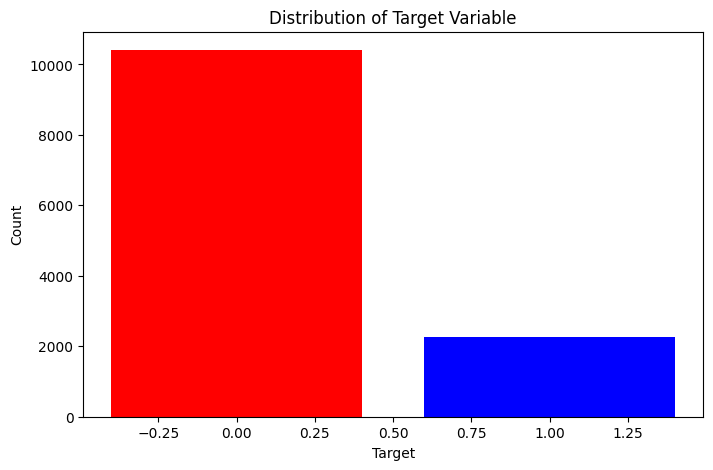

+-------+----------------------+-----------------+-----------------+
|summary|city_development_index|       experience|   training_hours|
+-------+----------------------+-----------------+-----------------+
|  count|                 12673|            12673|            12673|
|   mean|    0.8371295786187068|8.827953805152502|65.77306083800205|
| stddev|   0.11973796711444165|4.886299757392092|60.70531447419698|
|    min|                 0.448|                1|                1|
|    max|                 0.949|          Unknown|              336|
+-------+----------------------+-----------------+-----------------+

+---------------+-------------------+
|education_level|avg(training_hours)|
+---------------+-------------------+
|       Graduate|  66.33616868335929|
|    High School|  68.35737704918033|
|        Masters|  63.83582535885167|
|            Phd|  69.25454545454545|
| Primary School| 43.214285714285715|
+---------------+-------------------+

+-----------+-----+------+---------

In [0]:
# Here we are going to perform various analysis and generate insights
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.appName("Data_Preprocessing_Analysis").getOrCreate()

# Initial data analysis and insights

# Counting of target values (e.g., '1' for positive class and '0' for negative class)
target_counts = df.groupBy("target").count().orderBy("target")
target_counts.show()

# Plotting the distribution of the target variable
target_counts_df = target_counts.toPandas()
plt.figure(figsize=(8, 5))
plt.bar(target_counts_df["target"], target_counts_df["count"], color=['red', 'blue'])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

# Calculating and displaying summary statistics for numerical columns
numeric_summary = df.describe(["city_development_index", "experience", "training_hours"])
numeric_summary.show()

# Calculating the average training hours by education level
avg_training_hours_by_education = df.groupBy("education_level").avg("training_hours").orderBy("education_level")
avg_training_hours_by_education.show()

# Counting the number of unique values in categorical columns
unique_values_count = df.select([count(when(~isnan(c) & (col(c) != ""), c)).alias(c) for c in df.columns if c not in ["city_development_index", "experience", "training_hours"]])
unique_values_count.show()

# Finding the top 5 most common values in categorical columns
top_n_values = 5
top_n_values_count = {}
categorical_columns = [c for c in df.columns if c not in ["city_development_index", "experience", "training_hours"]]
for col_name in categorical_columns:
    top_values = df.groupBy(col_name).count().orderBy(col("count"), ascending=False).limit(top_n_values)
    top_n_values_count[col_name] = top_values

for col_name, top_values_df in top_n_values_count.items():
    print(f"Top {top_n_values} values for column '{col_name}':")
    top_values_df.show()

# Calculating the average training hours by major discipline
avg_training_hours_by_discipline = df.groupBy("major_discipline").avg("training_hours").orderBy("avg(training_hours)", ascending=False)
avg_training_hours_by_discipline.show()

# Calculating the correlation between 'city_development_index' and 'training_hours'
correlation = df.stat.corr("city_development_index", "training_hours")
print(f"Correlation between 'city_development_index' and 'training_hours': {correlation}")

# Analyzing the distribution of 'experience' column
experience_distribution = df.groupBy("experience").count().orderBy("experience")
experience_distribution.show()

# Calculating the percentage of positive class (target=1) in the dataset
positive_class_percentage = df.filter(df["target"] == 1).count() / df.count() * 100
print(f"Percentage of positive class (target=1): {positive_class_percentage:.2f}%")

# Analyzing the distribution of 'company_type' column
company_type_distribution = df.groupBy("company_type").count().orderBy("count", ascending=False)
company_type_distribution.show()

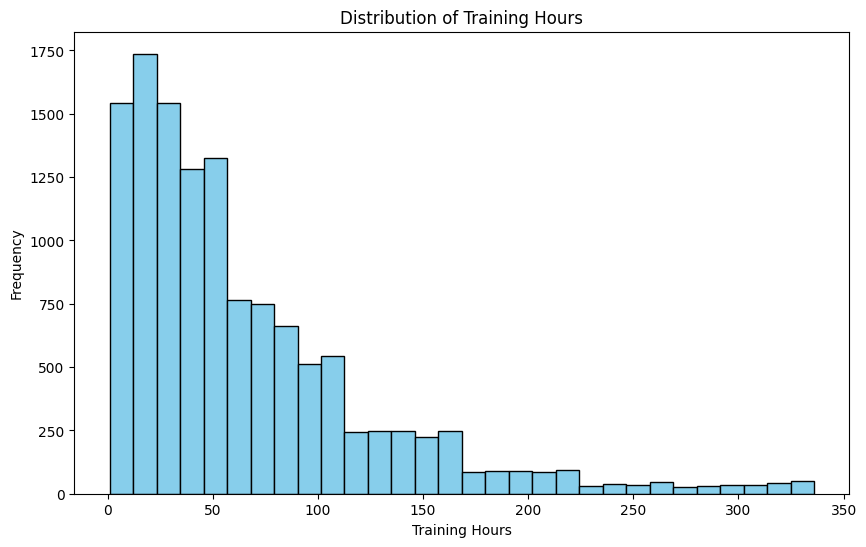

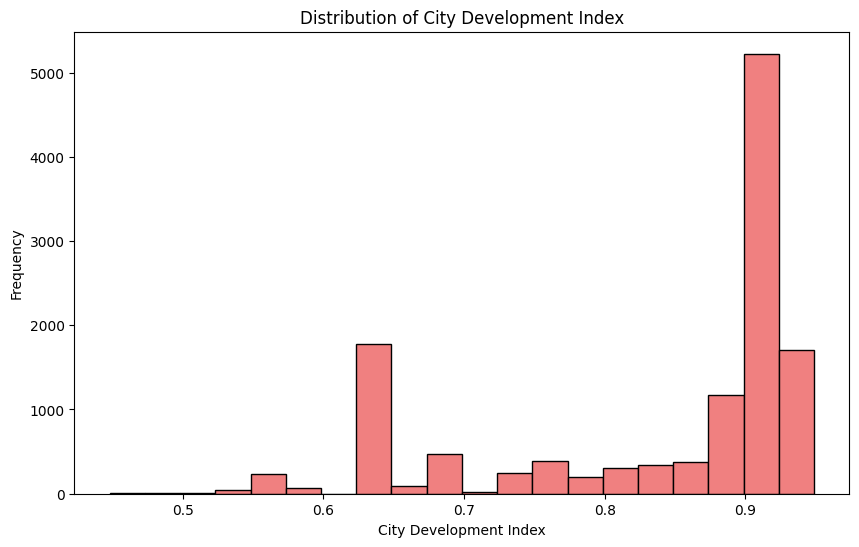

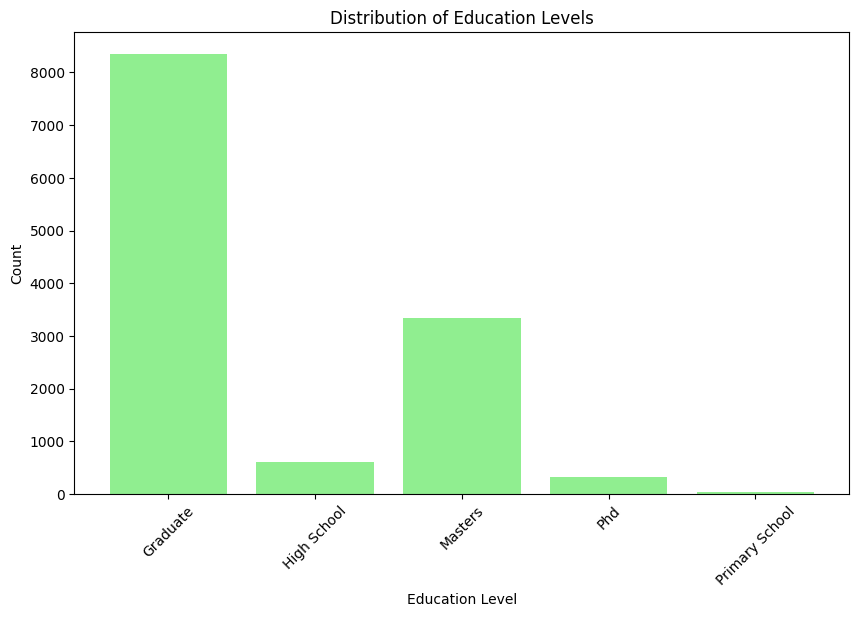

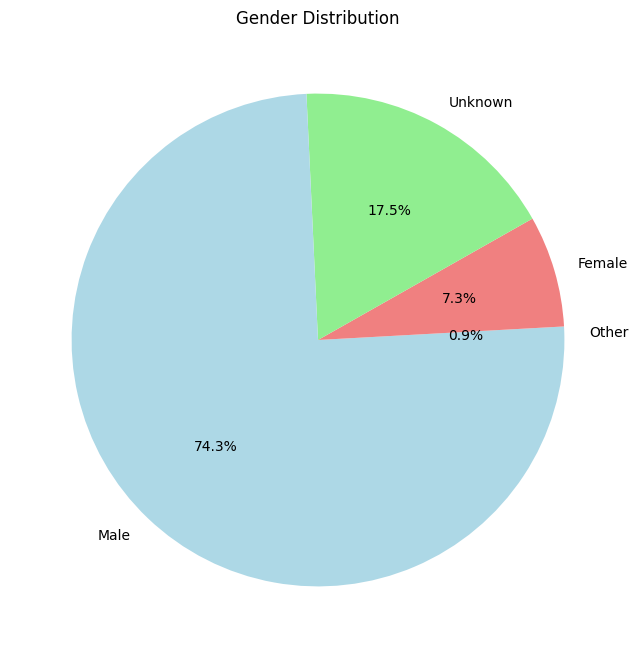

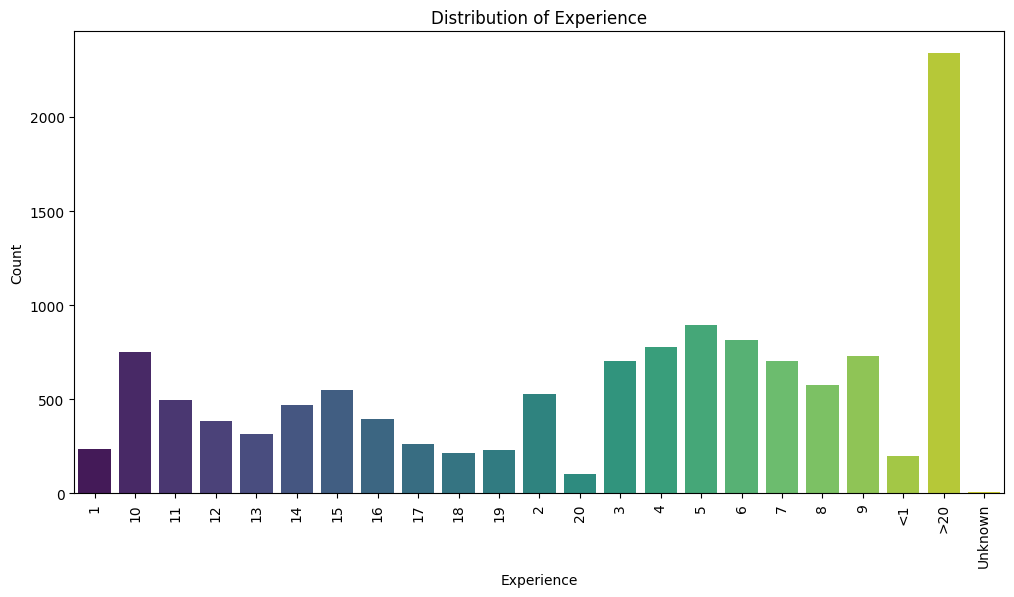

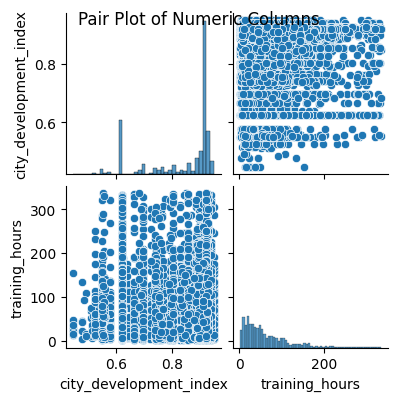

In [0]:
# Some more additional visualizations using the seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of 'training_hours' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df.select("training_hours").rdd.flatMap(lambda x: x).collect(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Training Hours")
plt.xlabel("Training Hours")
plt.ylabel("Frequency")
plt.show()

# Visualizing the distribution of 'city_development_index' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df.select("city_development_index").rdd.flatMap(lambda x: x).collect(), bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribution of City Development Index")
plt.xlabel("City Development Index")
plt.ylabel("Frequency")
plt.show()

# Creating a bar chart for the distribution of 'education_level'
education_counts = df.groupBy("education_level").count().orderBy("education_level")
education_levels = education_counts.select("education_level").rdd.flatMap(lambda x: x).collect()
count_values = education_counts.select("count").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.bar(education_levels, count_values, color='lightgreen')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Creating a pie chart to visualize the gender distribution
gender_counts = df.groupBy("gender").count().orderBy("count")
genders = gender_counts.select("gender").rdd.flatMap(lambda x: x).collect()
gender_count_values = gender_counts.select("count").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(8, 8))
plt.pie(gender_count_values, labels=genders, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Gender Distribution")
plt.show()

# Visualizing the distribution of 'experience' using a bar chart
experience_counts = df.groupBy("experience").count().orderBy("experience")
experience_levels = experience_counts.select("experience").rdd.flatMap(lambda x: x).collect()
count_values = experience_counts.select("count").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(12, 6))
sns.barplot(x=experience_levels, y=count_values, palette="viridis")
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Creating a pair plot to visualize relationships between numeric columns
numeric_cols = ["city_development_index", "experience", "training_hours"]
numeric_df = df.select(numeric_cols).toPandas()
sns.pairplot(numeric_df, height=2)
plt.suptitle("Pair Plot of Numeric Columns")
plt.show()

# Thank you